In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_excel("airbnb_amsterdam.xlsx")

In [3]:
#show 5 data
df.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price_category
0,3,1.0,2,1,2,1,52.369802,4.858930,3,3,2.938979,0,1,0,0,Low
1,4,1.0,3,1,1,1,52.353641,4.904810,2,27,2.862356,0,1,0,0,Medium
2,2,1.0,1,2,2,2,52.367143,4.982494,2,13,5.792076,0,0,1,0,Low
3,3,1.0,1,1,2,1,52.351166,4.894002,3,6,3.135803,1,1,0,0,Low
4,2,1.0,1,1,1,1,52.354419,4.934173,6,34,3.624058,0,0,1,0,Low


In [4]:
# show max value  accomodates
df["accommodates"].max()

16

In [5]:
df["accommodates"].value_counts()

2     290
4     288
6      74
5      48
3      41
8      19
1      12
16     10
7       7
10      4
12      3
Name: accommodates, dtype: int64

In [6]:
# accommodates AirBnb over 3 bedrooms
df['bedrooms'].where(df['bedrooms'] == 3).value_counts()

3.0    126
Name: bedrooms, dtype: int64

In [7]:
#show low value of price category
low_p = df['price_category'] == 'Low'
sum(low_p)

229

<AxesSubplot:xlabel='price_category'>

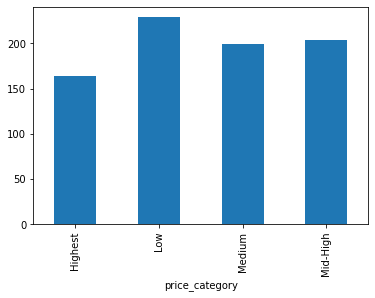

In [8]:
df.groupby('price_category').size().plot(kind='bar')

In [9]:
#selection feature
feature = ['accommodates','bathrooms','bedrooms','guests_included','minimum_nights','d_centre','number_of_reviews']
X = df[feature]
X_df = X.values
X_df

array([[ 3.        ,  1.        ,  2.        , ...,  3.        ,
         2.93897864,  3.        ],
       [ 4.        ,  1.        ,  3.        , ...,  2.        ,
         2.86235588, 27.        ],
       [ 2.        ,  1.        ,  1.        , ...,  2.        ,
         5.79207633, 13.        ],
       ...,
       [ 2.        ,  1.        ,  1.        , ...,  3.        ,
         2.60105452,  8.        ],
       [ 4.        ,  1.        ,  2.        , ...,  3.        ,
         5.95184324,  0.        ],
       [ 4.        ,  2.        ,  2.        , ...,  2.        ,
         3.27948289,  8.        ]])

In [10]:
#select a target label
prediksi = ['price_category']
Y = df[prediksi]
Y_df = Y.values
Y_df 

array([['Low'],
       ['Medium'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Mid-High'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Low'],
       ['Low'],
       ['Medium'],
       ['Low'],
       ['Medium'],
       ['Medium'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Highest'],
       ['Low'],
       ['Highest'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Mid-High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Highest'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Mid-High'],
       ['Low'],
       ['Low'],
       ['Mid-High'],
       ['Low'],
       ['Low'],
       ['Mid-High'],
       ['Low'],
       ['Highest'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       

In [19]:
#change the target label from string to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_df = le.fit_transform(Y_df)
Y_df

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1,
       1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 0, 1, 3, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3,

In [12]:
#import module  preprocessing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=0)

In [13]:
#classfication using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=0)

model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [14]:
#get model evaluation
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        29
           1       0.62      0.61      0.62        49
           2       0.36      0.33      0.34        40
           3       0.50      0.57      0.53        42

    accuracy                           0.49       160
   macro avg       0.48      0.48      0.48       160
weighted avg       0.49      0.49      0.49       160



In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics

In [16]:
# show accuracy_score
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.49375

In [17]:
# confusion matrix
confusion_array = sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_array)

[[12  1  2 14]
 [ 1 30 18  0]
 [ 3 14 13 10]
 [12  3  3 24]]


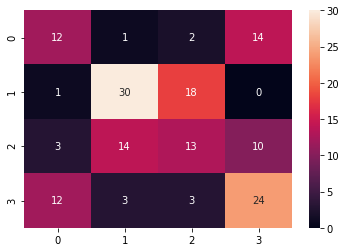

In [18]:
# confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')